# Step 4: Gaussian Mixture Model, GMM

## SETUP

In [1]:
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt

--2025-05-01 06:54:57--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2253 (2.2K) [text/plain]
Saving to: ‘old_faithful.txt’

old_faithful.txt    100%[===================>]   2.20K  --.-KB/s    in 0s      

2025-05-01 06:54:58 (33.9 MB/s) - ‘old_faithful.txt’ saved [2253/2253]



## old_faithful.py

(272, 2)
[ 3.6 79. ]
[ 1.8 54. ]


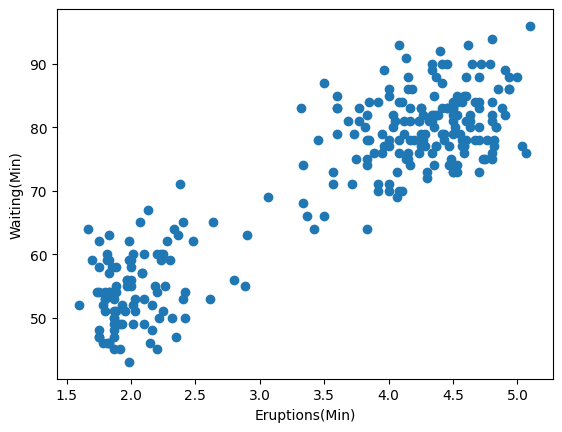

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = 'old_faithful.txt'
xs = np.loadtxt(path)

print(xs.shape)
print(xs[0])
print(xs[1])

plt.scatter(xs[:,0], xs[:,1])
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()

## gmm_sampling.py

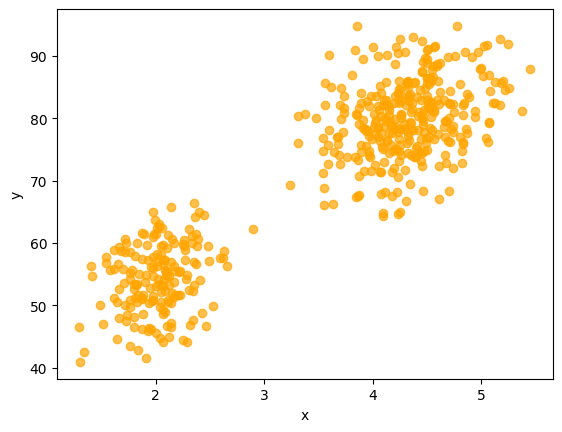

In [3]:
import numpy as np
import matplotlib.pyplot as plt


mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


def sample():
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    x = np.random.multivariate_normal(mu, cov)
    return x

N = 500
xs = np.zeros((N, 2))
for i in range(N):
     xs[i] = sample()

plt.scatter(xs[:,0], xs[:,1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## gmm.py

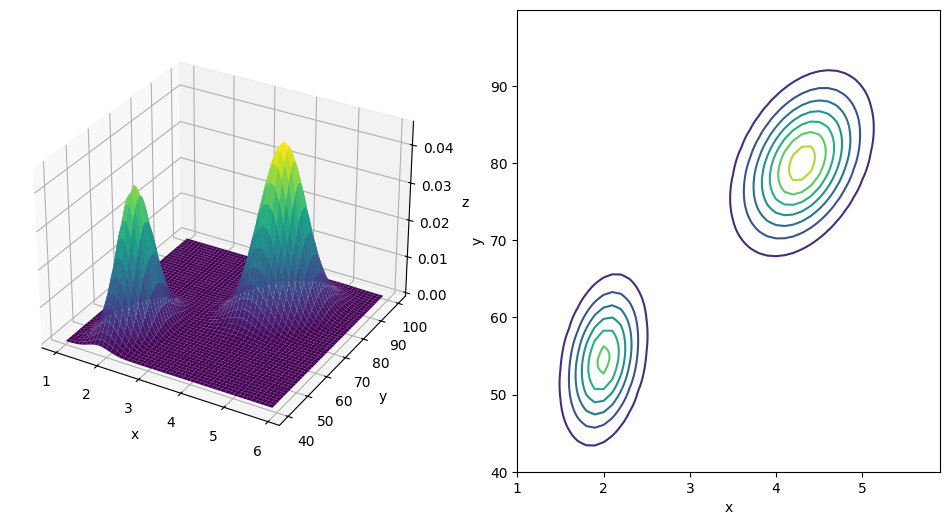

In [4]:
import numpy as np
import matplotlib.pyplot as plt


mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y


# plot
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()